In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_excel("data/ireland_hospital_c19_stats.xlsx", sheet_name=0)

df = df[0:23]
df

,date,c19_icu_cases,new_deaths,available_icu_beds,c19_ventilated_cases
0,2020-04-13,144,31,135,105
1,2020-04-14,147,41,133,99
2,2020-04-15,142,38,127,94
3,2020-04-16,138,42,115,90
4,2020-04-17,132,44,126,88
5,2020-04-18,140,41,132,94
6,2020-04-19,138,39,142,91
7,2020-04-20,138,77,140,94
8,2020-04-21,132,44,133,88
9,2020-04-22,130,38,140,87


<IPython.core.display.Javascript object>


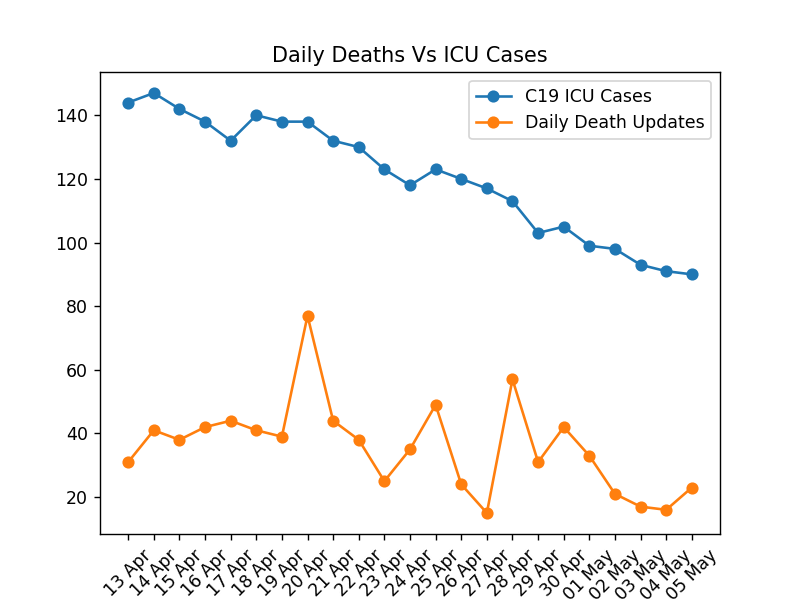

In [223]:
# ICU Cases vs Deaths
x = df['date']
fig,ax = plt.subplots()
plt.title("Daily Deaths Vs ICU Cases")
plt.plot(x, df['c19_icu_cases'], label="C19 ICU Cases",  marker='o')
plt.plot(x, df['new_deaths'], label='Daily Death Updates', marker='o')
#plt.plot(x, df['available_icu_beds'], label='Available ICU Beds', marker='o')
monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.show()
plt.savefig("output/daily_deaths_vs_icu.png")

<IPython.core.display.Javascript object>


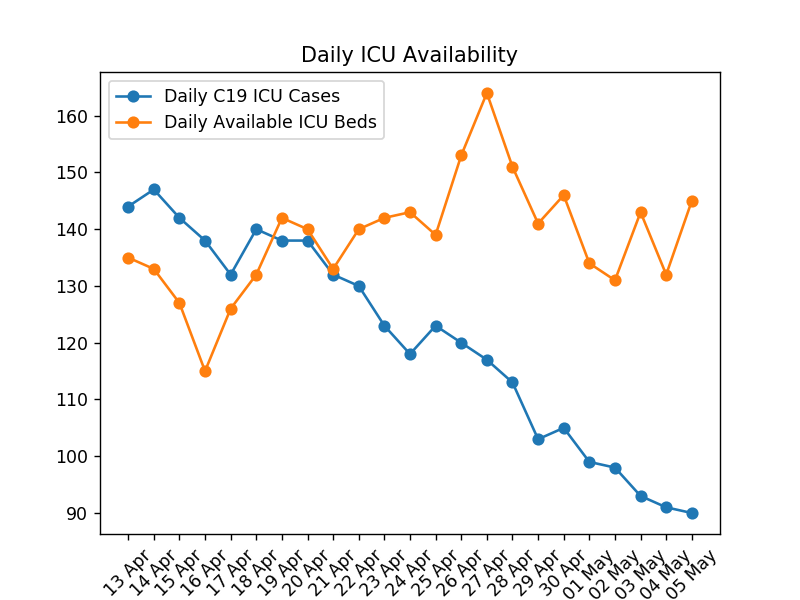

In [224]:
# ICU Availability
fig,ax = plt.subplots()
plt.title("Daily ICU Availability")
plt.plot(x, df['c19_icu_cases'], label="Daily C19 ICU Cases",  marker='o')
plt.plot(x, df['available_icu_beds'], label='Daily Available ICU Beds', marker='o')
monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.show()
plt.savefig("output/daily_icu_avail.png")

<IPython.core.display.Javascript object>


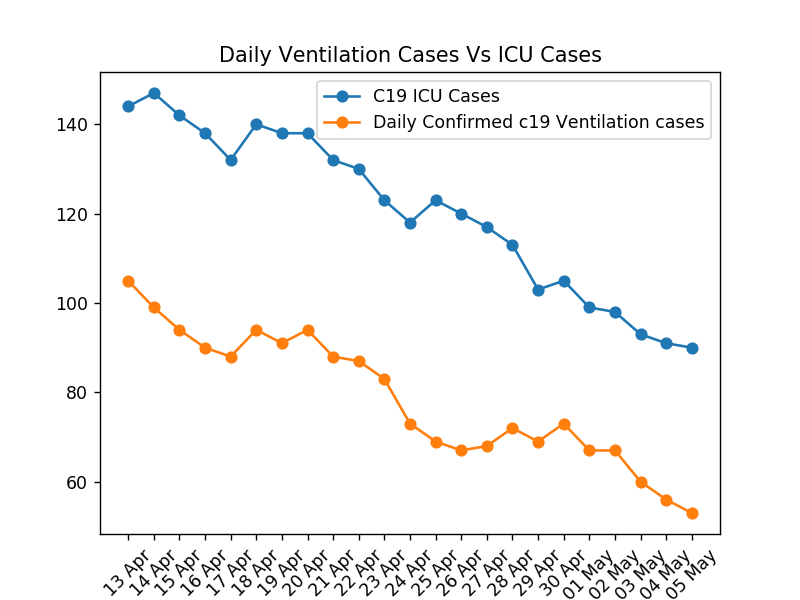

In [225]:
# ICU Cases Vs Ventilation Case
fig,ax = plt.subplots()
plt.title("Daily Ventilation Cases Vs ICU Cases")
plt.plot(x, df['c19_icu_cases'], label="C19 ICU Cases",  marker='o')
plt.plot(x, df['c19_ventilated_cases'], label='Daily Confirmed c19 Ventilation cases', marker='o')
monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.show()
plt.savefig("output/daily_ventilation_vs_icu.png")

In [226]:
df_hspc = pd.read_csv("http://opendata-geohive.hub.arcgis.com/datasets/d8eb52d56273413b84b0187a4e9117be_0.csv?outSR={%22latestWkid%22:3857,%22wkid%22:102100}")
df_hspc['Date'] = pd.to_datetime(df_hspc['Date'], unit='ms') # csv file date format was changed to milliseconds
df_hspc['Datestr'] = df_hspc['Date'].dt.strftime('%d/%m')
# add new hospital admissions
HospitalisedAged5 = df_hspc["HospitalisedAged5"].diff().clip(0)
df_hspc.insert(14, "HospitalisedAged5_new", HospitalisedAged5)

HospitalisedAged5to14 = df_hspc["HospitalisedAged5to14"].diff().clip(0)
df_hspc.insert(16, "HospitalisedAged5to14_new", HospitalisedAged5to14)
# HospitalisedAged15to24
HospitalisedAged15to24 = df_hspc["HospitalisedAged15to24"].diff().clip(0)
df_hspc.insert(18, "HospitalisedAged15to24_new", HospitalisedAged15to24)
# HospitalisedAged25to34
HospitalisedAged25to34 = df_hspc["HospitalisedAged25to34"].diff().clip(0)
df_hspc.insert(20, "HospitalisedAged25to34_new", HospitalisedAged25to34)
# HospitalisedAged35to44
HospitalisedAged35to44 = df_hspc["HospitalisedAged35to44"].diff().clip(0)
df_hspc.insert(22, "HospitalisedAged35to44_new", HospitalisedAged35to44)
# HospitalisedAged45to54
HospitalisedAged45to54 = df_hspc["HospitalisedAged45to54"].diff().clip(0)
df_hspc.insert(24, "HospitalisedAged45to54_new", HospitalisedAged45to54)
# HospitalisedAged55to64
HospitalisedAged55to64 = df_hspc["HospitalisedAged55to64"].diff().clip(0)
df_hspc.insert(26, "HospitalisedAged55to64_new", HospitalisedAged55to64)
# HospitalisedAged65up
HospitalisedAged65up = df_hspc["HospitalisedAged65up"].diff().clip(0)
df_hspc.insert(28, "HospitalisedAged65up_new", HospitalisedAged65up)

df_hspc = df_hspc.tail(30)
df_hspc.tail()


,Date,ConfirmedCovidCases,TotalConfirmedCovidCases,ConfirmedCovidDeaths,TotalCovidDeaths,ConfirmedCovidRecovered,TotalCovidRecovered,StatisticsProfileDate,CovidCasesConfirmed,HospitalisedCovidCases,RequiringICUCovidCases,HealthcareWorkersCovidCases,ClustersNotified,HospitalisedAged5,HospitalisedAged5_new,HospitalisedAged5to14,HospitalisedAged5to14_new,HospitalisedAged15to24,HospitalisedAged15to24_new,HospitalisedAged25to34,HospitalisedAged25to34_new,HospitalisedAged35to44,HospitalisedAged35to44_new,HospitalisedAged45to54,HospitalisedAged45to54_new,HospitalisedAged55to64,HospitalisedAged55to64_new,HospitalisedAged65up,HospitalisedAged65up_new,Male,Female,Unknown,Aged1,Aged1to4,Aged5to14,Aged15to24,Aged25to34,Aged35to44,Aged45to54,Aged55to64,Aged65up,Median_Age,CommunityTransmission,CloseContact,TravelAbroad,UnderInvestigation,FID,Datestr
60,2020-05-01,221,20833,34,1265,13386,13386,1588118400000,20510.0,2768.0,367.0,5840.0,646.0,16.0,1.0,8.0,0.0,56.0,1.0,173.0,3.0,232.0,1.0,368.0,8.0,416.0,10.0,1496.0,37.0,8605.0,11841.0,64.0,35.0,66.0,205.0,1363.0,3271.0,3491.0,3752.0,2706.0,5596.0,49.0,66.0,33.0,3.0,9965.0,1664,01/05
61,2020-05-02,343,21176,25,1286,13386,13386,1588204800000,20742.0,2785.0,368.0,5973.0,676.0,16.0,0.0,8.0,0.0,56.0,0.0,173.0,0.0,232.0,0.0,373.0,5.0,415.0,0.0,1509.0,13.0,8695.0,11979.0,68.0,35.0,66.0,206.0,1383.0,3314.0,3532.0,3803.0,2736.0,5642.0,49.0,63.0,34.0,3.0,12862.0,1665,02/05
62,2020-05-03,330,21506,19,1303,13386,13386,1588291200000,21064.0,2825.0,363.0,6068.0,694.0,18.0,2.0,11.0,3.0,58.0,2.0,174.0,1.0,235.0,3.0,381.0,8.0,422.0,7.0,1524.0,15.0,8841.0,12166.0,57.0,38.0,69.0,215.0,1417.0,3373.0,3588.0,3858.0,2772.0,5711.0,49.0,63.0,34.0,3.0,13041.0,1666,03/05
63,2020-05-04,266,21772,16,1319,13386,13386,1588377600000,21437.0,2840.0,364.0,6211.0,703.0,18.0,0.0,12.0,1.0,58.0,0.0,176.0,2.0,236.0,1.0,383.0,2.0,423.0,1.0,1532.0,8.0,9045.0,12334.0,58.0,39.0,70.0,223.0,1460.0,3463.0,3667.0,3918.0,2816.0,5758.0,49.0,63.0,34.0,3.0,13315.0,1667,04/05
64,2020-05-05,211,21983,23,1339,13386,13386,1588464000000,21659.0,2879.0,369.0,6293.0,706.0,18.0,0.0,13.0,1.0,59.0,1.0,179.0,3.0,240.0,4.0,389.0,6.0,424.0,1.0,1555.0,23.0,9151.0,12446.0,62.0,39.0,72.0,230.0,1475.0,3496.0,3714.0,3956.0,2843.0,5810.0,49.0,62.0,35.0,3.0,13489.0,1668,05/05


<IPython.core.display.Javascript object>


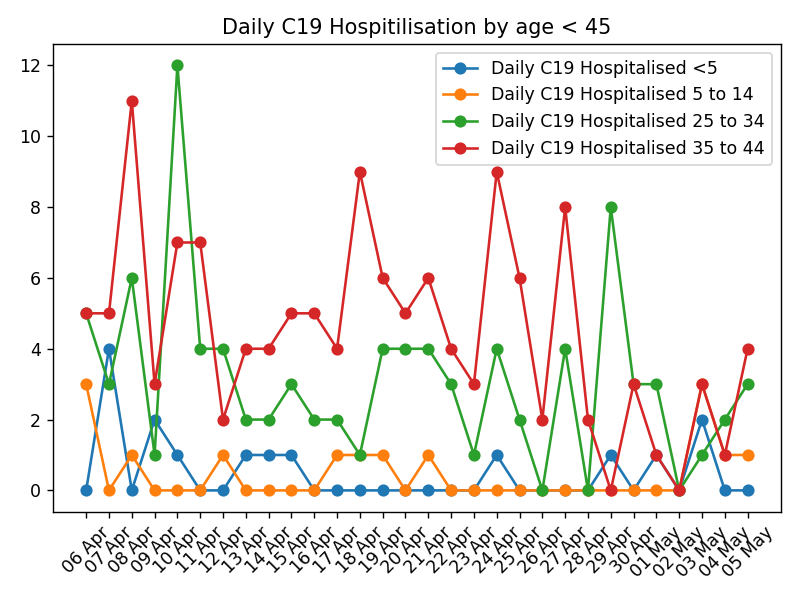

In [227]:
# Daily C19 Hospitilisation by age < 45
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Daily C19 Hospitilisation by age < 45")
plt.plot(x, df_hspc['HospitalisedAged5_new'], label='Daily C19 Hospitalised <5', marker='o')
plt.plot(x, df_hspc['HospitalisedAged5to14_new'], label='Daily C19 Hospitalised 5 to 14', marker='o')
plt.plot(x, df_hspc["HospitalisedAged25to34_new"], label='Daily C19 Hospitalised 25 to 34', marker='o')
plt.plot(x, df_hspc["HospitalisedAged35to44_new"], label='Daily C19 Hospitalised 35 to 44', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_daily_by_age_less_than_45.png")

<IPython.core.display.Javascript object>


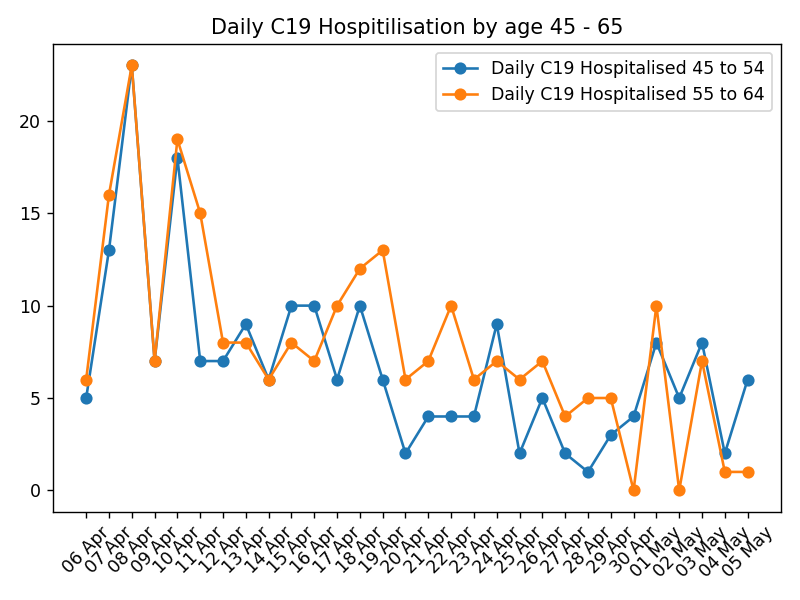

In [228]:
# Daily C19 Hospitilisation by age 45 - 65
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Daily C19 Hospitilisation by age 45 - 65")
plt.plot(x, df_hspc["HospitalisedAged45to54_new"], label='Daily C19 Hospitalised 45 to 54', marker='o')
plt.plot(x, df_hspc["HospitalisedAged55to64_new"], label='Daily C19 Hospitalised 55 to 64', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_daily_by_age_greater_than_45.png")

<IPython.core.display.Javascript object>


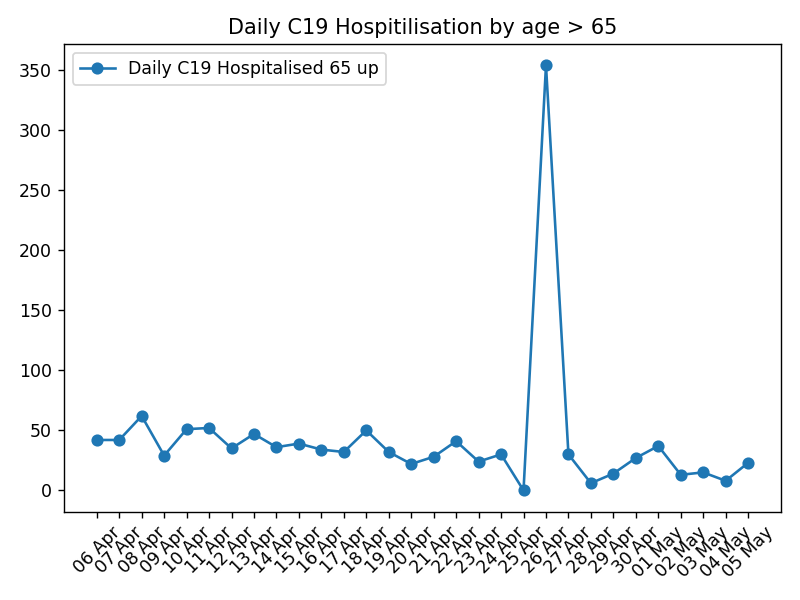

In [229]:
# Daily C19 Hospitilisation by age > 65
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Daily C19 Hospitilisation by age > 65")
plt.plot(x, df_hspc["HospitalisedAged65up_new"], label='Daily C19 Hospitalised 65 up', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_daily_by_age_greater_than_65.png")

<IPython.core.display.Javascript object>


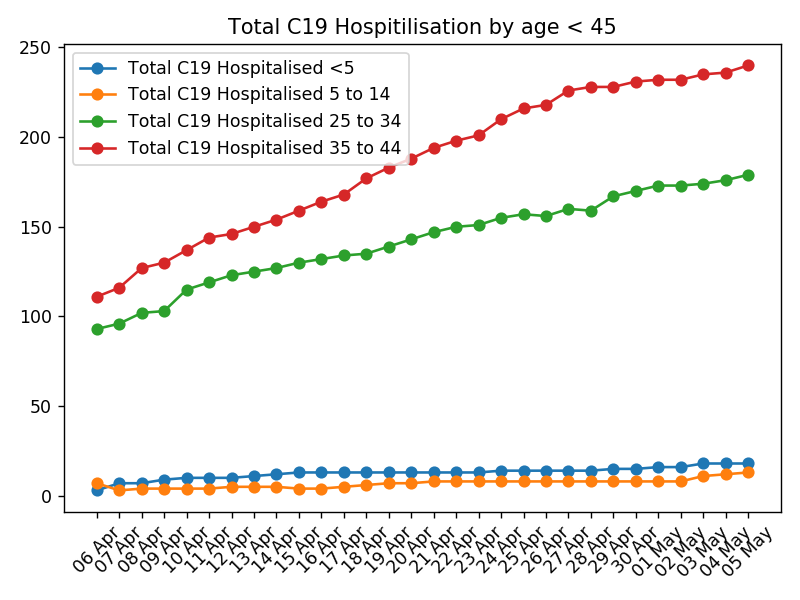

In [230]:
# Total C19 Hospitilisation by age < 45
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Total C19 Hospitilisation by age < 45")
plt.plot(x, df_hspc['HospitalisedAged5'], label='Total C19 Hospitalised <5', marker='o')
plt.plot(x, df_hspc['HospitalisedAged5to14'], label='Total C19 Hospitalised 5 to 14', marker='o')
plt.plot(x, df_hspc["HospitalisedAged25to34"], label='Total C19 Hospitalised 25 to 34', marker='o')
plt.plot(x, df_hspc["HospitalisedAged35to44"], label='Total C19 Hospitalised 35 to 44', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_total_by_age_less_than_45.png")

<IPython.core.display.Javascript object>


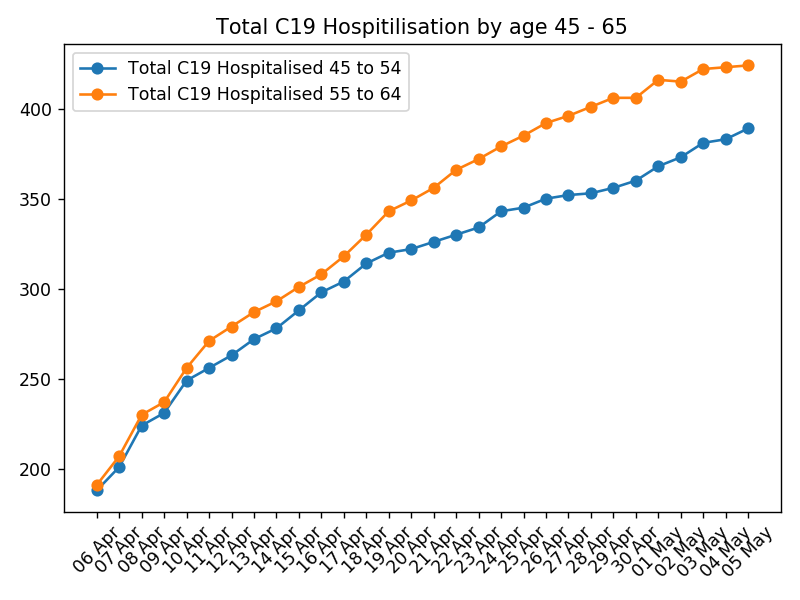

In [231]:
# Total C19 Hospitilisation by age 45 - 65
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Total C19 Hospitilisation by age 45 - 65")
plt.plot(x, df_hspc["HospitalisedAged45to54"], label='Total C19 Hospitalised 45 to 54', marker='o')
plt.plot(x, df_hspc["HospitalisedAged55to64"], label='Total C19 Hospitalised 55 to 64', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_total_by_age_greater_than_45.png")

<IPython.core.display.Javascript object>


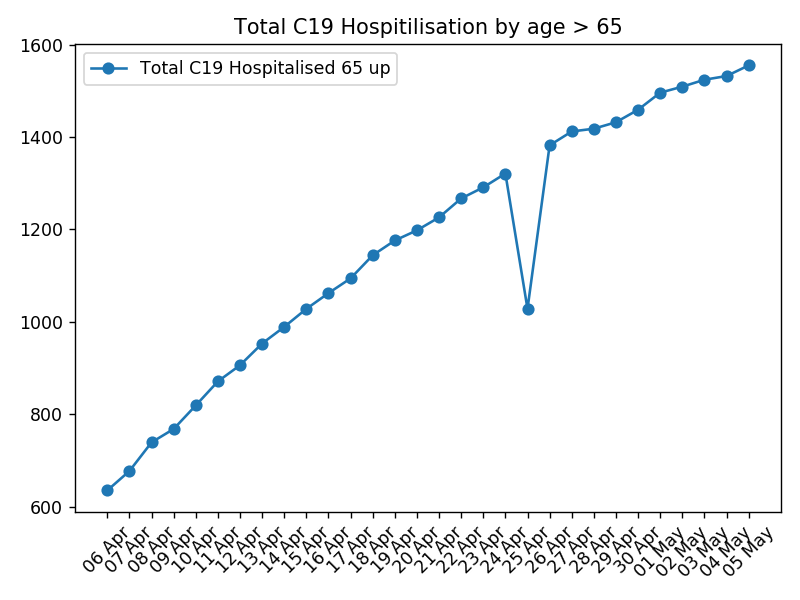

In [232]:
# Total C19 Hospitilisation by age > 65
x = df_hspc['Date']
fig,ax = plt.subplots()
plt.title("Total C19 Hospitilisation by age > 65")
plt.plot(x, df_hspc["HospitalisedAged65up"], label='Total C19 Hospitalised 65 up', marker='o')

monthyearFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(monthyearFmt)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.legend()
plt.minorticks_off()
plt.tight_layout()
plt.show()
plt.savefig("output/hospatilsation_total_by_age_greater_than_65.png")